In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
#create a model class that inherits the NN module
class Model(nn.Module):
    #Input layer  (4 features of the flower) ---> hidden layer 1 (neurons)  ----> h2(neurons) ---> output
    def __init__(self,in_features=4,h1=8,h2=9,out_features=3):
        super().__init__() #instantinate our nn.module
        self.fc1 = nn.Linear(in_features,h1)
        self.fc2 = nn.Linear(h1,h2)
        self.out = nn.Linear(h2,out_features)
        
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)

        return x

In [3]:
#pick a manual seed for randomization
torch.manual_seed(32)

#create an instance of model
model =  Model()

In [4]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
df = pd.read_csv(url)
df.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [5]:
#change from string to integers
df['variety'] = df['variety'].replace('Setosa', 0)
df['variety'] = df['variety'].replace('Versicolor', 1)
df['variety'] = df['variety'].replace('Virginica', 2)
df

/var/folders/yk/dxnr7pzs6v1c6xh8xr6nb5xc0000gn/T/ipykernel_54139/2419832340.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['variety'] = df['variety'].replace('Virginica', 2)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
#Train test and split X
X = df.drop('variety',axis=1)
y = df['variety'] 

In [7]:
#convert to numpy array
X = np.array(X)
y = np.array(y)

In [8]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=41 ) 

In [9]:
#convert to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [10]:
#convert to long tensors
y_train = torch.tensor(y_train,dtype=torch.long)
y_test = torch.tensor(y_test,dtype=torch.long)

In [11]:
#set the criterion of model to measure the error
criterion = nn.CrossEntropyLoss()

#choose Adam optimizer and lr = learning rate
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [12]:
model.parameters
#Train our models
#Epochs we want?
epochs = 100
losses = []
for i in range(epochs):
    #go forward and get a prediction
    y_pred = model.forward(X_train)


    #measure the loss/error 
    loss = criterion(y_pred,y_train)

    #keep track of our losses
    losses.append(loss.detach().numpy())

    #print every 10 epochs
    if i % 10 ==0:
        print(f'Epoch: {i} and loss: {loss}')

    #back propogation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 and loss: 1.1642626523971558
Epoch: 10 and loss: 0.9502732157707214
Epoch: 20 and loss: 0.7863701581954956
Epoch: 30 and loss: 0.6350342631340027
Epoch: 40 and loss: 0.4286562204360962
Epoch: 50 and loss: 0.2817978858947754
Epoch: 60 and loss: 0.1705012172460556
Epoch: 70 and loss: 0.10465352982282639
Epoch: 80 and loss: 0.07380601763725281
Epoch: 90 and loss: 0.0584549717605114


Text(0.5, 0, 'Epochs')

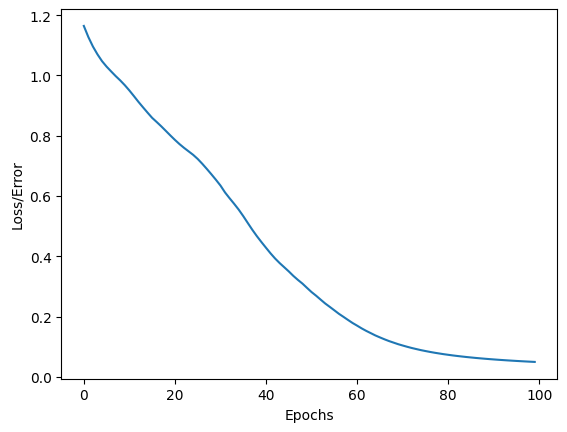

In [13]:
#graph the loss
plt.plot(range(epochs), losses)
plt.ylabel("Loss/Error")
plt.xlabel("Epochs")

In [14]:
#Evaluate model on test data (validate model on test)
with torch.no_grad(): #Basically turns off back propogation
    y_eval = model.forward(X_test) #X_test are features from test set and y_val will be our evaluation
    loss = criterion(y_eval,y_test)

In [15]:
loss

tensor(0.1240)

In [16]:
correct = 0
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_val = model.forward(data)

        #will tell us what type does our network predicts
        print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

        #correct or not
        if y_val.argmax().item() == y_test[i]:
            correct+=1

print(f'We got {correct} correct out of 30')

1.) tensor([-7.2039,  2.1721,  5.4994]) 	 2 	 2
2.) tensor([-9.1732,  1.3745,  7.8775]) 	 2 	 2
3.) tensor([-10.1985,   1.7705,   8.6772]) 	 2 	 2
4.) tensor([-3.0827,  4.1812, -0.1920]) 	 1 	 1
5.) tensor([-8.3784,  2.0315,  6.6663]) 	 2 	 2
6.) tensor([-1.5283,  4.3402, -1.9532]) 	 1 	 1
7.) tensor([-6.5455,  2.5353,  4.4948]) 	 2 	 2
8.) tensor([-2.5963,  4.2664, -0.8098]) 	 1 	 1
9.) tensor([-7.2847,  2.3287,  5.3471]) 	 2 	 2
10.) tensor([-9.6250,  1.4546,  8.2593]) 	 2 	 2
11.) tensor([-5.8126,  2.7934,  3.5324]) 	 2 	 2
12.) tensor([  7.1656,   1.4196, -11.7688]) 	 0 	 0
13.) tensor([  6.4275,   1.2548, -10.5445]) 	 0 	 0
14.) tensor([-0.5550,  3.7271, -2.5152]) 	 1 	 1
15.) tensor([  6.1486,   1.6963, -10.5360]) 	 0 	 0
16.) tensor([-5.4478,  3.2660,  2.8794]) 	 2 	 1
17.) tensor([  6.4697,   1.4848, -10.8310]) 	 0 	 0
18.) tensor([-6.4601,  2.5550,  4.4103]) 	 1 	 2
19.) tensor([  7.6222,   1.2384, -12.2484]) 	 0 	 0
20.) tensor([ 5.2052,  1.5668, -9.0110]) 	 0 	 0
21.) tensor

In [17]:
#predict the class for a given dataset
new_iris = torch.tensor([4.7,3.2,1.3,0.2])

In [18]:
with torch.no_grad():
    print(model(new_iris))

tensor([  6.8775,   1.2704, -11.2076])


In [19]:
#save or NN model
torch.save(model.state_dict(), 'my_first_NN_model.pt')

In [20]:
#load the saved model
new_model = Model()
new_model.load_state_dict(torch.load('my_first_NN_model.pt'))

<All keys matched successfully>

In [21]:
#make sure it loaded correctly
new_model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>